## Analisi diffusione COVID-19 nel mondo
Il committente richiede di avere un report su casi e vaccinazioni in diverse aree del mondo; a tal fine, richiede di utilizzare il dataset, curato da Our World in Data, all'indirizzo https://github.com/owid/covid-19-data/tree/master/public/data; alla voce "🗂 dataset" scaricare il dataset nel formato che si preferisce.

**- Si richiede di verificare le dimensioni del dataset e i relativi metadati:**

In [393]:
# Importazione dele librerie necessarie allo svolgimento dell'Analisi
import pandas as pd #utile per lavorare con dati strutturati
import matplotlib.pyplot as plt #utile per la creazione di grafici e visualizzazioni dati
import seaborn as sns #utile per la creazione di grafici statistici e di alta qualità

In [376]:
# Caricamento del dataset
file_path = "/Users/Giulia/Desktop/EPICODE/PYTHON/Esercizio_finale/owid-covid-data.csv"
df = pd.read_csv(file_path)

In [377]:
# Dimensioni del dataset
print(df.shape)
print(f"Il dataset è composto da {df.shape[0]} righe e {df.shape[1]} colonne.")

(409576, 67)
Il dataset è composto da 409576 righe e 67 colonne.


In [394]:
# Analisi dei metadati
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409576 entries, 0 to 409575
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    409576 non-null  object        
 1   continent                                   389982 non-null  object        
 2   location                                    409576 non-null  object        
 3   date                                        409576 non-null  datetime64[ns]
 4   total_cases                                 370544 non-null  float64       
 5   new_cases                                   398301 non-null  float64       
 6   new_cases_smoothed                          397071 non-null  float64       
 7   total_deaths                                347781 non-null  float64       
 8   new_deaths                                  398701 non-null  float64      

**- Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente; si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente:**

In [379]:
# Estrapolazione di un campione casuale di 10 righe per poter esplorare il dataset 
df.sample(10)

iso_code      continent     location        date  total_cases  \
41479        BTN           Asia       Bhutan  2022-04-17      52796.0   
214371       MWI         Africa       Malawi  2022-06-20      86189.0   
192161       KGZ           Asia   Kyrgyzstan  2021-09-18      61611.0   
192449       KGZ           Asia   Kyrgyzstan  2022-07-03      82989.0   
247340       NAM         Africa      Namibia  2023-09-17     172111.0   
263962       PRK           Asia  North Korea  2020-03-26          NaN   
136436       GIB         Europe    Gibraltar  2020-05-03        136.0   
100162       ECU  South America      Ecuador  2022-09-15     998202.0   
400951  OWID_WLS         Europe        Wales  2022-03-12          NaN   
4925         DZA         Africa      Algeria  2020-02-24          NaN   

        new_cases  new_cases_smoothed  total_deaths  new_deaths  \
41479     10574.0            1510.571          18.0         4.0   
214371        0.0              14.143        2643.0         0.0   
192161        0.0              92.000         637.0         0.0   
192449       48.0               6.857        1024.0         0.0   
247340      113.0              16.143        4100.0         2.0   
263962        0.0               0.000           NaN         0.0   
136436        8.0               1.143           NaN         0.0   
100162        0.0             202.429       35876.0         0.0   
400951        NaN                 NaN           NaN         NaN   
4925          0.0               0.000           NaN         0.0   

        new_deaths_smoothed  ...  male_smokers  handwashing_facilities  \
41479                 0.571  ...           NaN                  79.807   
214371                0.143  ...          24.7                   8.704   
192161                2.857  ...          50.5                  89.220   
192449                0.000  ...          50.5                  89.220   
247340                0.286  ...          34.2                  44.600   
263962                0.000  ...           NaN                     NaN   
136436                0.000  ...           NaN                     NaN   
100162                2.286  ...          12.3                  80.635   
400951                  NaN  ...           NaN                     NaN   
4925                  0.000  ...          30.4                  83.741   

        hospital_beds_per_thousand  life_expectancy  human_development_index  \
41479                          1.7            71.78                    0.654   
214371                         1.3            64.26                    0.483   
192161                         4.5            71.45                    0.697   
192449                         4.5            71.45                    0.697   
247340                         NaN            63.71                    0.646   
263962                        13.2            72.27                      NaN   
136436                         NaN            79.93                      NaN   
100162                         1.5            77.01                    0.759   
400951                         NaN              NaN                      NaN   
4925                           1.9            76.88                    0.748   

        population  excess_mortality_cumulative_absolute  \
41479     782457.0                                   NaN   
214371  20405318.0                                   NaN   
192161   6630621.0                                   NaN   
192449   6630621.0                                   NaN   
247340   2567024.0                                   NaN   
263962  26069416.0                                   NaN   
136436     32677.0                                   NaN   
100162  18001002.0                                   NaN   
400951   3170000.0                                   NaN   
4925    44903228.0                                   NaN   

        excess_mortality_cumulative  excess_mortality  \
41479                           NaN               Na

In [380]:
#Filtro delle righe per continenti non nulli
df_continent = df[df["continent"].notna()]

In [381]:
# Verifica della nuova dimensione del dataset
print(f"Il dataset è composto da {df_continent.shape[0]} righe e {df_continent.shape[1]} colonne.")

Il dataset è composto da 389982 righe e 67 colonne.


In [395]:
# Possiamo ora calcolare il numero totale dei casi totali, raggruppandoli per continente
# Trasformazione del risultato in un DataFrame
total_cases_continent_df = total_cases_continent.reset_index() 
#  Questo metodo resetta l'indice della Serie. Quando eseguiamo un'operazione di raggruppamento con groupby(), 
# il risultato è spesso una Serie con l'indice che corrisponde al valore utilizzato per il raggruppamento 
# (in questo caso, i continenti). reset_index() rimuove questo indice e lo trasforma in una colonna nel 
# DataFrame risultante.

# Formattazione dei numeri con separatori di migliaia e due cifre decimali
total_cases_continent_df['new_cases'] = total_cases_continent_df['new_cases'].apply(lambda x: f"{x:,.2f}")
# La funzione lambda prende ogni valore x, lo formatta con due cifre decimali (:,.2f), e aggiunge il separatore 
# delle migliaia (,) se necessario.

# Visualizzazione dei risultati
print("Numero dei casi totali per continente:")
print(total_cases_continent_df.to_string(index=False))

Numero dei casi totali per continente:
    continent      new_cases
       Africa  13,144,264.00
         Asia 301,515,124.00
       Europe 252,672,573.00
North America 124,572,945.00
      Oceania  14,973,467.00
South America  68,832,646.00


**- Sempre riguardo i casi totali, si chiede di scrivere del codice che, date due variabili contenenti i nomi di continenti, ne confronti i seguenti relativi descrittori statistici: valore massimo, media, e percentuale rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente);**

In [396]:
# Specifico i nomi dei continenti da confrontare
continent1 = "Europe"
continent2 = "Oceania"

# Filtro i dati per ciascun continente
filtro1 = df.continent == continent1
filtro2 = df.continent == continent2
df_continent1 =  df.loc[filtro1, :]
df_continent2 = df.loc[filtro2, :]

# Calcolo il totale dei casi nel mondo (passaggio utile per poi calcolarmi i dati percentuali)
casi_totali = df[df["location"] == "World"]["total_cases"].max()

# Descrittori statistici
max_continent1 = df_continent1["total_cases"].max()
max_continent2 = df_continent2["total_cases"].max()

mean_continent1 = df_continent1["total_cases"].mean()
mean_continent2 = df_continent2["total_cases"].mean()

total = df["total_cases"].sum()

percentage_continent1 = (df_continent1["total_cases"].sum()/total)*100
percentage_continent2 = (df_continent2["total_cases"].sum()/total)*100

In [384]:
# Formatto i risultati per una migliore leggibilità e comprensione dei dati

formatted_max_continent1 = f"{max_continent1:,.2f}"
formatted_max_continent2 = f"{max_continent2:,.2f}"

formatted_mean_continent1 = f"{mean_continent1:,.2f}"
formatted_mean_continent2 = f"{mean_continent2:,.2f}"

formatted_percentage_continent1 = f"{percentage_continent1:,.2f}"
formatted_percentage_continent2 = f"{percentage_continent2:,.2f}"

formatted_casi_totali = f"{casi_totali:,.2f}"

print(f"I casi totali di Covid-19 nel mondo sono {formatted_casi_totali} e sono così distribuiti:")
print(f"Massimo casi in {continent1}: {formatted_max_continent1}")
print(f"Massimo casi in {continent2}: {formatted_max_continent2}")
print(f"Media casi in {continent1}: {formatted_mean_continent1}")
print(f"Media casi in {continent2}: {formatted_mean_continent2}")
print(f"Percentuale casi in {continent1} sul totale: {formatted_percentage_continent1}%")
print(f"Percentuale casi in {continent2} sul totale: {formatted_percentage_continent2}%")

I casi totali di Covid-19 nel mondo sono 775,643,495.00 e sono così distribuiti:
Massimo casi in Europe: 38,997,490.00
Massimo casi in Oceania: 11,861,161.00
Media casi in Europe: 2,801,516.96
Media casi in Oceania: 385,340.92
Percentuale casi in Europe sul totale: 7.81%
Percentuale casi in Oceania sul totale: 0.38%


**- Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data. Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario). Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, e commentare se ci sono similarità con l'andamento del numero dei casi totali;**

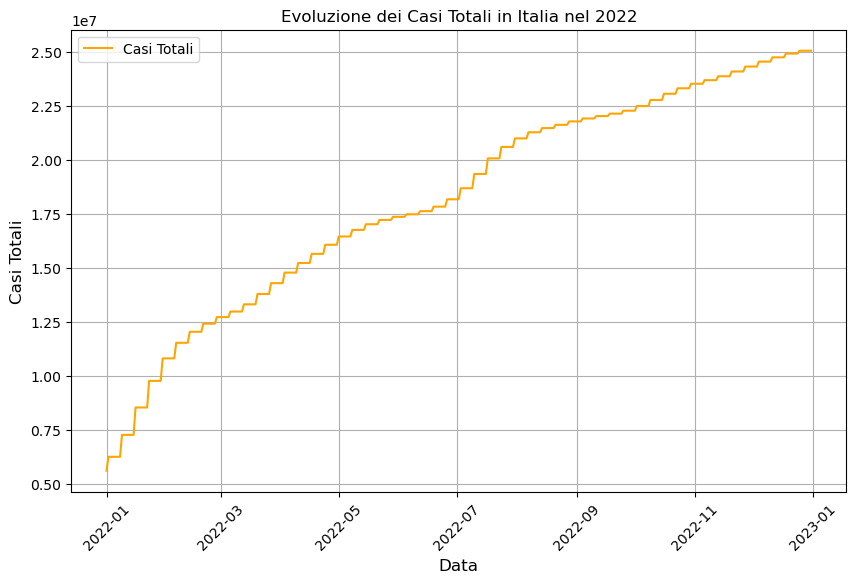

In [385]:
# Filtrare i dati per l'Italia nel 2022
df['date'] = pd.to_datetime(df['date'])
italy_2022 = df[(df['location'] == 'Italy') & (df['date'].dt.year == 2022)]

# Evoluzione dei casi totali
plt.figure(figsize=(10, 6))
plt.plot(italy_2022['date'], italy_2022['total_cases'], label='Casi Totali', color = "Orange")
plt.title('Evoluzione dei Casi Totali in Italia nel 2022')
plt.xlabel('Data',fontsize=12)
plt.ylabel('Casi Totali',fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()



Commento : 
Questo grafico mostra l'andamento nel tempo dei casi totali confermati di COVID-19 in Italia nel 2022.
L'asse x rappresenta le date, mentre l'asse y rappresenta il numero totale di casi.
È evidente una crescita nel numero di casi nel corso dell'anno, con eventuali picchi e fluttuazioni che possono essere interpretati in base agli eventi epidemiologici e alle politiche di controllo adottate

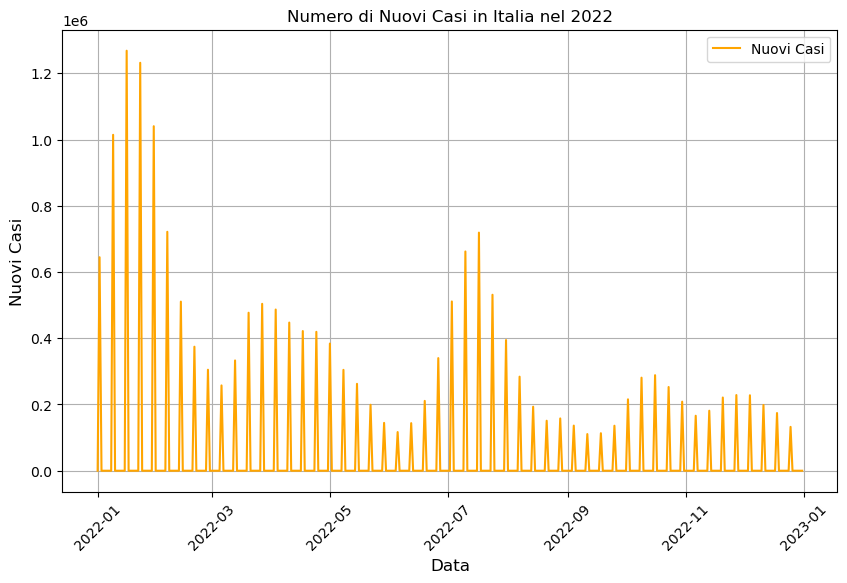

In [386]:
# Numero di nuovi casi
plt.figure(figsize=(10, 6))
plt.plot(italy_2022['date'], italy_2022['new_cases'], label='Nuovi Casi', color='orange')
plt.title('Numero di Nuovi Casi in Italia nel 2022')
plt.xlabel('Data',fontsize=12)
plt.ylabel('Nuovi Casi', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()



Commento:
Questo grafico mostra l'andamento nel tempo dei nuovi casi giornalieri confermati di COVID-19 in Italia nel 2022.
L'asse x rappresenta le date, mentre l'asse y rappresenta il numero di nuovi casi confermati al giorno.
È possibile identificare picchi e cali nei nuovi casi giornalieri, riflettendo le variazioni nella trasmissione del virus e nei test effettuati.

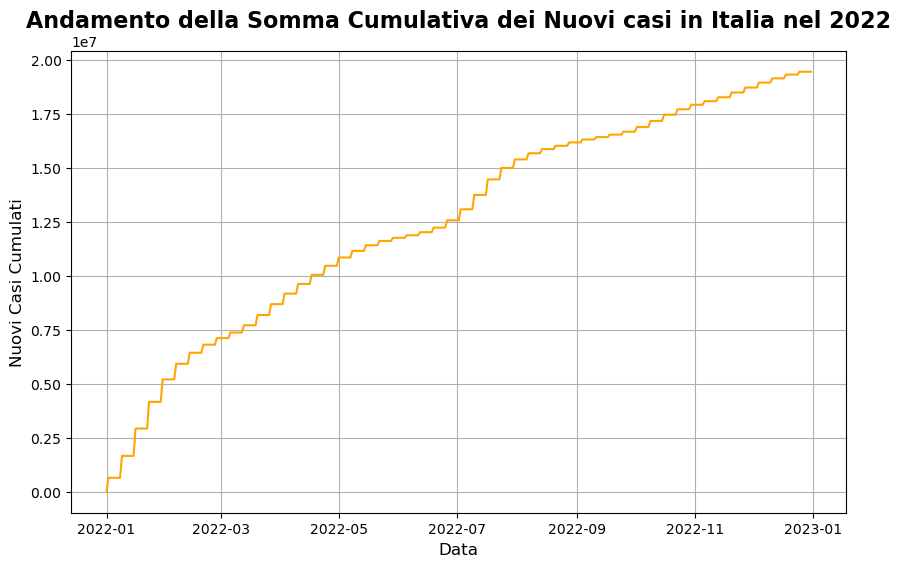

In [392]:
# Calcolo della somma cumulativa dei nuovi casi
italy_2022.loc[:, 'cumulative_new_cases'] = italy_2022['new_cases'].cumsum()

plt.figure(figsize=(10, 6))
plt.plot(italy_2022['date'], italy_2022['cumulative_new_cases'], color='orange')

plt.xlabel('Data', fontsize=12)
plt.ylabel('Nuovi Casi Cumulati', fontsize=12)
plt.title('Andamento della Somma Cumulativa dei Nuovi casi in Italia nel 2022', fontsize=16, fontweight='bold')

plt.grid(True)
plt.show()


Commento: 
Questo grafico mostra l'andamento nel tempo della somma cumulativa dei nuovi casi confermati di COVID-19 in Italia nel 2022.
L'asse x rappresenta le date, mentre l'asse y rappresenta il numero cumulativo di nuovi casi confermati fino a quella data.
Questo grafico è utile per comprendere l'accumulo complessivo dei nuovi casi nel corso dell'anno, fornendo una visione più completa della diffusione del virus nel tempo.

Commento finale: 
- Guardando l'andamento della somma cumulativa dei nuovi casi rispetto all'andamento dei casi totali nel tempo, possiamo osservare che entrambi gli andamenti mostrano un aumento nel numero di casi nel corso del tempo, il che è atteso durante un'epidemia come quella da COVID-19;
- Sebbene entrambi i grafici mostrino un aumento nel numero di casi nel tempo, la somma cumulativa dei nuovi casi è suscettibile di oscillazioni più pronunciate a breve termine rispetto ai casi totali.
- In generale, l'andamento della somma cumulativa dei nuovi casi segue da vicino l'andamento dei casi totali nel tempo, ma è più sensibile alle variazioni giornaliere. L'analisi della somma cumulativa può fornire una visione più dettagliata della crescita complessiva dei casi nel corso dell'epidemia, mentre l'andamento dei casi totali fornisce una prospettiva aggregata e a lungo termine della diffusione del virus.
- Possiamo comunque dire che, nonostante le differenze nelle modalità di rappresentazione, entrambi gli andamenti sono strettamente correlati, riflettendo l'evoluzione della pandemia nel tempo con diversi livelli di dettaglio e aggregazione.


**- Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso), e scrivere un breve commento a riguardo;**

<Figure size 1000x600 with 0 Axes>

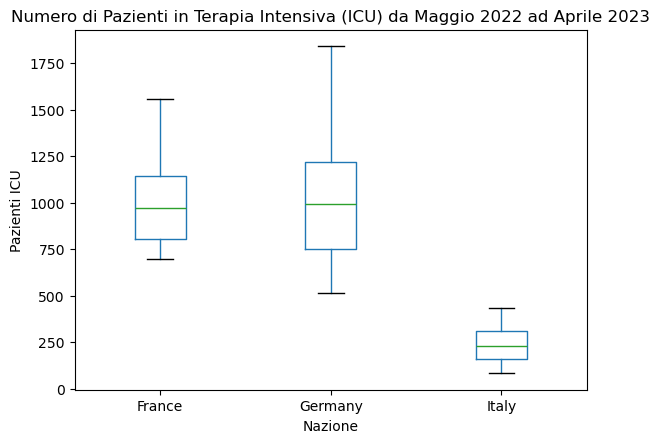

In [388]:
# Filtro i dati da maggio 2022 ad aprile 2023
df_filtered = df[(df['date'] >= '2022-05-01') & (df['date'] <= '2023-04-30')]
nazioni = ['Italy', 'Germany', 'France']
df_icu = df_filtered[df_filtered['location'].isin(nazioni)]

# Boxplot
plt.figure(figsize=(10, 6))
df_icu.boxplot(column='icu_patients', by='location', grid=False)
plt.title('Numero di Pazienti in Terapia Intensiva (ICU) da Maggio 2022 ad Aprile 2023')
plt.suptitle('')
plt.xlabel('Nazione')
plt.ylabel('Pazienti ICU')
plt.xticks(rotation=0)
plt.show()


**- Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, mostrare la somma dei pazienti ospitalizzati per ognuna — se ci sono dati nulli, suggerire se può essere possibile gestirli tramite sostituzione o meno.**

In [389]:
# Filtro i dati per il 2023 e per le nazioni specificate
df_2023 = df[df['date'].dt.year == 2023]
nazioni = ['Italy', 'Germany', 'France', 'Spain']
df_hospitalized = df_2023[df_2023['location'].isin(nazioni)]

# Somma dei pazienti ospitalizzati
hospitalized_sum = df_hospitalized.groupby('location')['hosp_patients'].sum().fillna(0)

# Formattazione dei numeri con separatori di migliaia e due decimali
hospitalized_sum_formatted = hospitalized_sum.apply(lambda x: f"{x:,.2f}")

# Visualizzare i risultati formattati
print("Somma dei pazienti ospitalizzati nel 2023:")
print(hospitalized_sum_formatted)

Somma dei pazienti ospitalizzati nel 2023:
location
France     1,382,574.00
Germany            0.00
Italy      1,175,272.00
Spain        354,602.00
Name: hosp_patients, dtype: object


In [390]:
#Formattazione dello script non tenendo conto dei valori nulli
# Filtro i dati per il 2023 e per le nazioni specificate
df_2023 = df[df['date'].dt.year == 2023]
nazioni = ['Italy', 'Germany', 'France', 'Spain']
df_hospitalized = df_2023[df_2023['location'].isin(nazioni)]

# Calcolo della somma dei pazienti ospitalizzati per ogni nazione
hospitalized_sum = df_hospitalized.groupby('location')['hosp_patients'].sum()

# Gestione dei dati nulli per la Germania
hospitalized_sum['Germany'] = hospitalized_sum.get('Germany', 0)

# Formattazione dei numeri con separatori di migliaia e due decimali
hospitalized_sum_formatted = hospitalized_sum.apply(lambda x: f"{x:,.2f}")

# Visualizzazione dei risultati senza il nome "Germany"
print("Somma dei pazienti ospitalizzati nel 2023 (esclusa la Germania se il dato è nullo):")
for country, value in hospitalized_sum_formatted.items():
    if country != 'Germany':  # Escludiamo esplicitamente la Germania dalla stampa
        print(f"{country}: {value}")

Somma dei pazienti ospitalizzati nel 2023 (esclusa la Germania se il dato è nullo):
France: 1,382,574.00
Italy: 1,175,272.00
Spain: 354,602.00


Commento: Ho deciso di trattare i dati nulli escludendo esplicitamente la Germania dalla stampa. Avrei potuto trattarli anche sostituendoli con un valore appropriato come per esempio "null" o la media dei valori non nulli.
Ho preferito escluderli per rendere la visualizzazione più fluida e leggibile. 